## Project Description
- Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

- Rain Dataset is to predict whether or not it will rain tomorrow. 

 
#### Problem Statement: 

     Design a predictive model with the use of machine learning algorithms to 
    
       a) forecast whether or not it will rain tomorrow.
   
       b) predict how much rainfall could be there.

- The Dataset contains about 10 years of daily weather observations of different locations in Australia.
   
   Dataset Description:
   
   Number of columns: 23


    Date  - The date of observation
    Location  -The common name of the location of the weather station
    MinTemp  -The minimum temperature in degrees celsius
    MaxTemp -The maximum temperature in degrees celsius
    Rainfall  -The amount of rainfall recorded for the day in mm
    Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    Sunshine  -The number of hours of bright sunshine in the day.
    WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
    WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    WindDir9am -Direction of the wind at 9am
    WindDir3pm -Direction of the wind at 3pm
    WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
    WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    Humidity9am -Humidity (percent) at 9am
    Humidity3pm -Humidity (percent) at 3pm
    Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
    Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    Cloud9am - Fraction of sky obscured by cloud at 9am. 
    Cloud3pm -Fraction of sky obscured by cloud 
    Temp9am-Temperature (degrees C) at 9am
    Temp3pm -Temperature (degrees C) at 3pm
    RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".
    

### Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv


### Read and understand dataset

In [261]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
os.chdir('F:\FlipRobo\Project Evaluation\Rainfall prediction')

In [263]:
df=pd.read_csv('Rainfall.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [264]:
df.shape

(8425, 23)

#### Observation:
- Rows = 8425
- Columns = 23

#### Next: 
- To perform exploratory data analysis

### Exploratory data analysis
### (i) To explore data type of all the  variables

In [265]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Observation:
- Categorical variables: 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'


- Numerical variables: 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm','Sunshine'


- All the numerical variables are of discrete type.

#### Next:
- To explore missing values in the dataframe.

In [266]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

#### Observation:
- Except 'Date', 'Location', there are missing values in all the variables.

#### Next:
- Variable 'Date' has no physical effect on rain prediction. So it can be set as index.

#### Setting the variable "Date" as index

In [267]:
df.set_index('Date', inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Observation:
- 'Date' has been assigned as the index of the dataframe.

#### Next:
- As the numerical variables are continuous, therefore imputing the missing values by their mean, and categorical variables are of discrete type so imputing the missing value by their mode.

In [268]:
Numerical=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm','Sunshine']
Categorical=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in Categorical:
    df[i] = df[i].fillna(df[i].mode()[0])
for j in Numerical:
    df[j] = df[j].fillna(df[j].mean())
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Observation:
- None of the variables have any missing value.

#### Next:
- Visualization and distribution of the variables

### (iii) To explore distribution of all the  variables

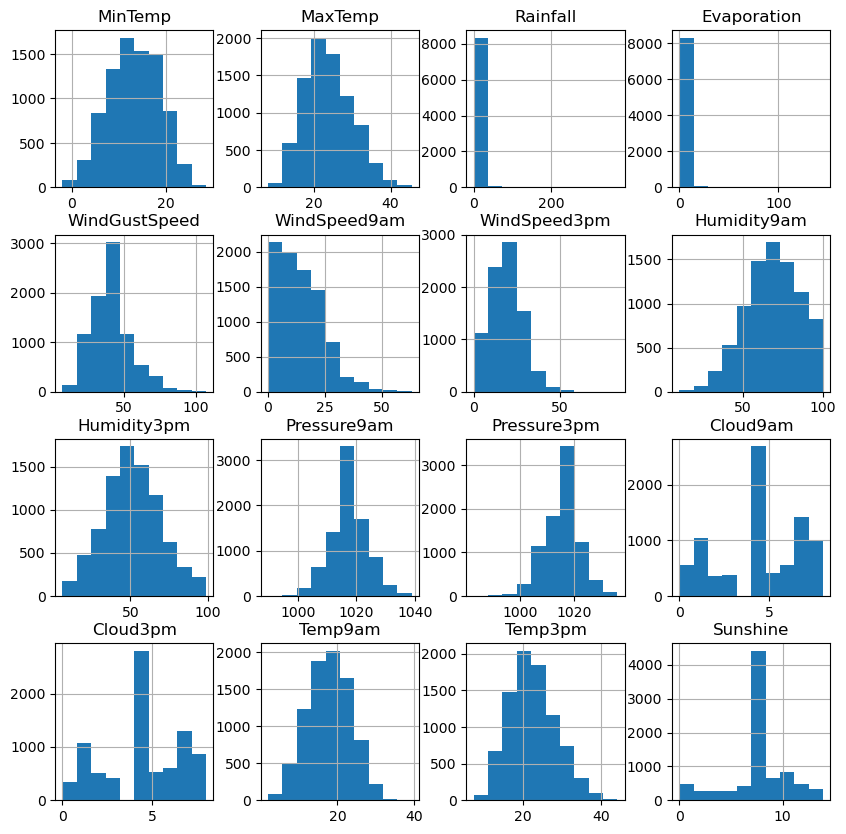

In [269]:
# Histogram for continous numerical variables.
df[Numerical].hist(figsize=(10,10))
plt.show()

#### Observation:
- Some variables are skewed.

#### Next
- To find the skewness of the variables

In [270]:
abs(df[Numerical].skew())

MinTemp           0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am       0.256743
Humidity3pm       0.118281
Pressure9am       0.024082
Pressure3pm       0.010214
Cloud9am          0.366503
Cloud3pm          0.276294
Temp9am           0.014748
Temp3pm           0.397331
Sunshine          0.716525
dtype: float64

#### Observation:
- Rainfall, Evaporation, WindGustSpeed and Sunshine have absolute skewness more than 0.7. This signifies very high skewness.

#### Next:
- To check for outliers in these variables using boxplot

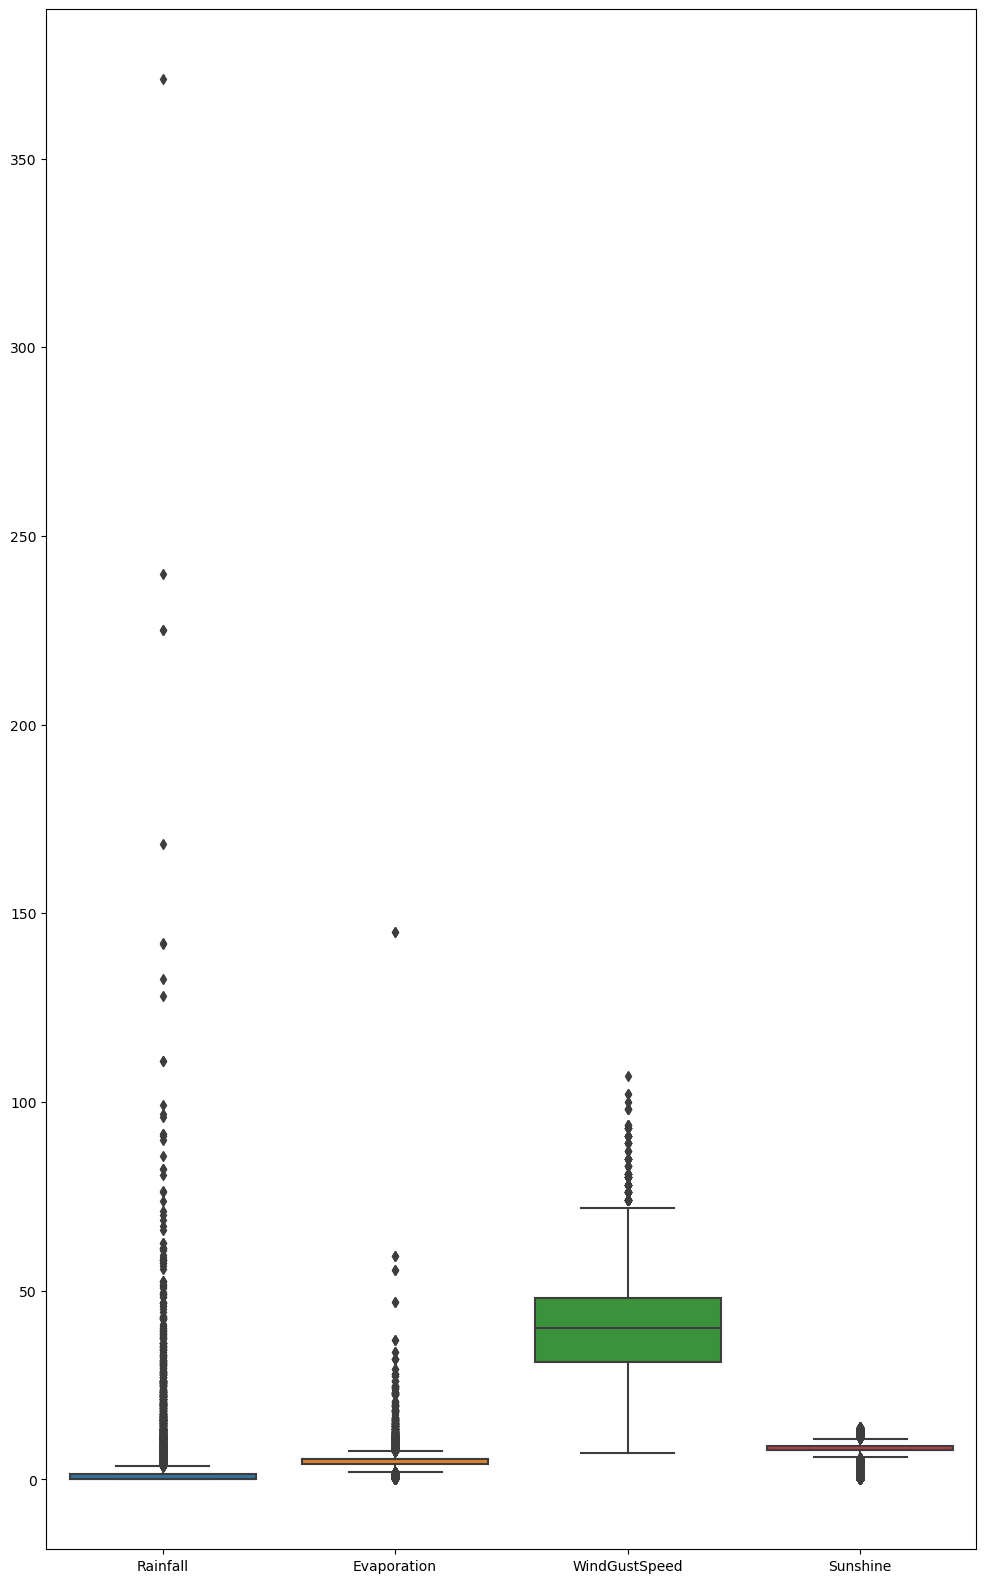

In [271]:
plt.figure(figsize=(12,20))
# for i in Numerical:
sns.boxplot(data=df[["Rainfall", "Evaporation", "WindGustSpeed", "Sunshine"]])
plt.xticks(rotation=0)
plt.show()

#### Observation:
- It is clearly visible that their a significant number of data lying beyond 1.5 times of inter quartile range(IQR). It means there are significant outliers.

#### Next:
- To check distribution of categorical variables usng count plot

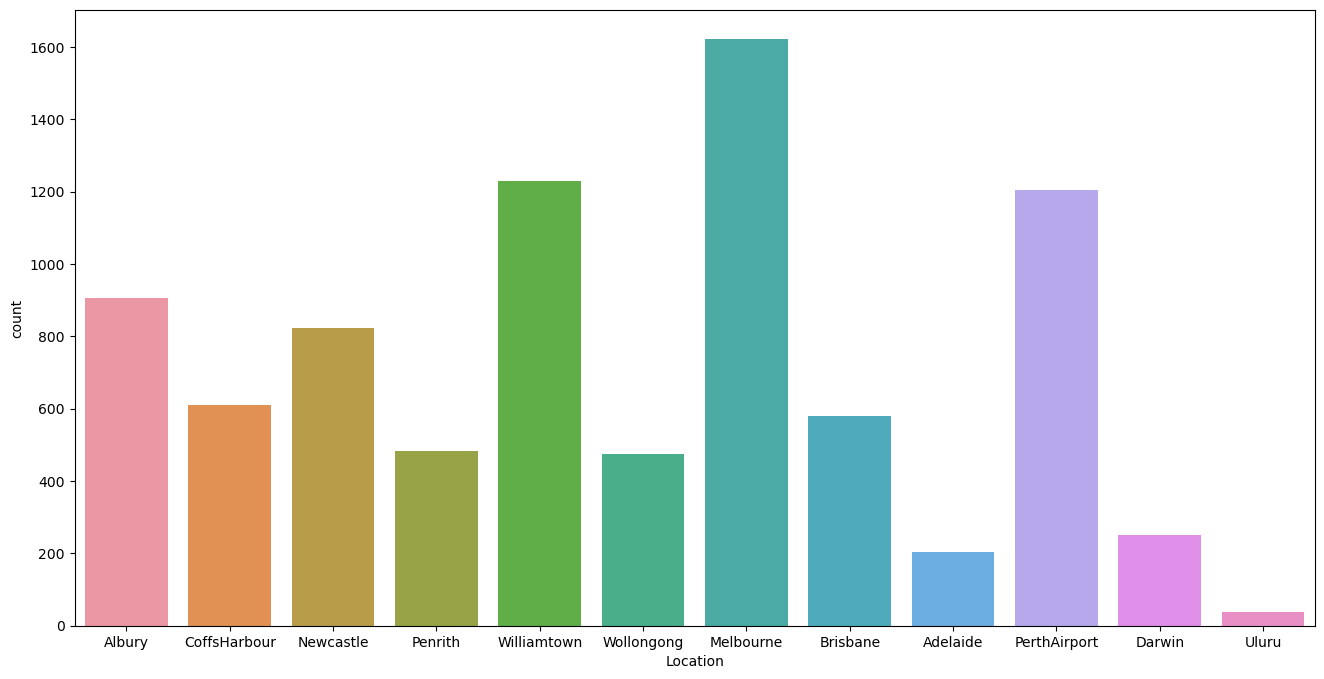

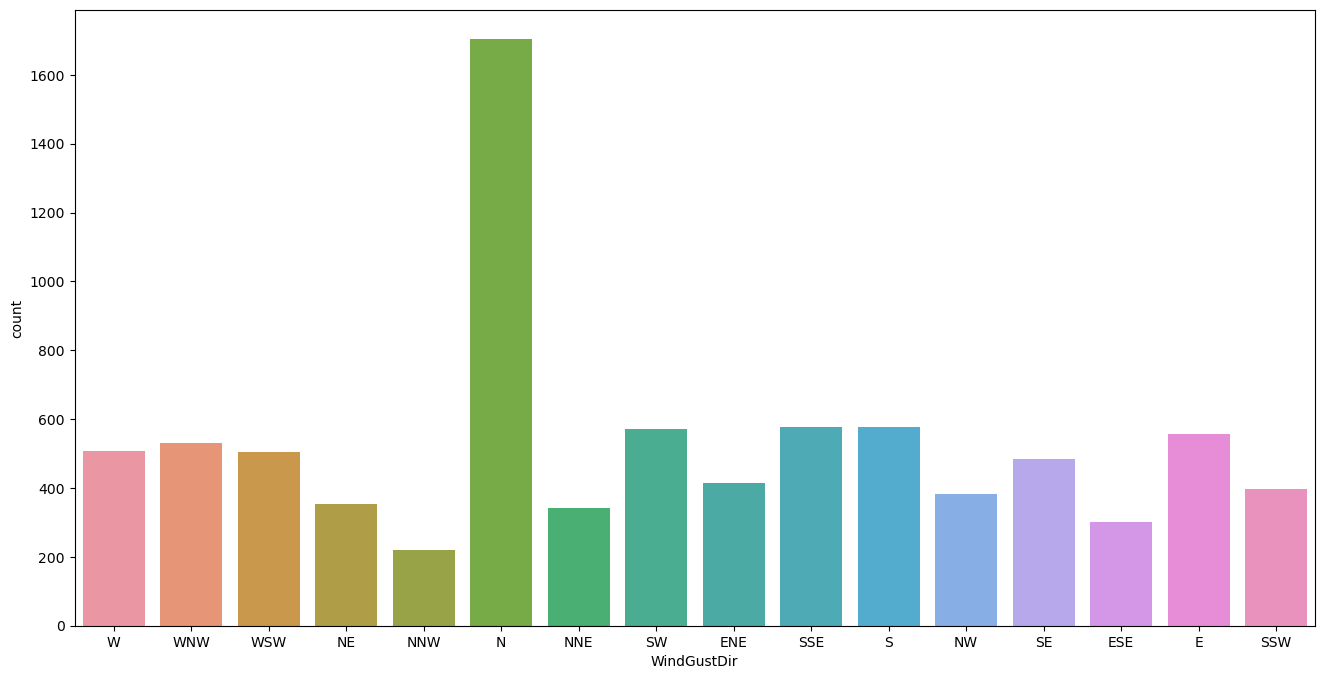

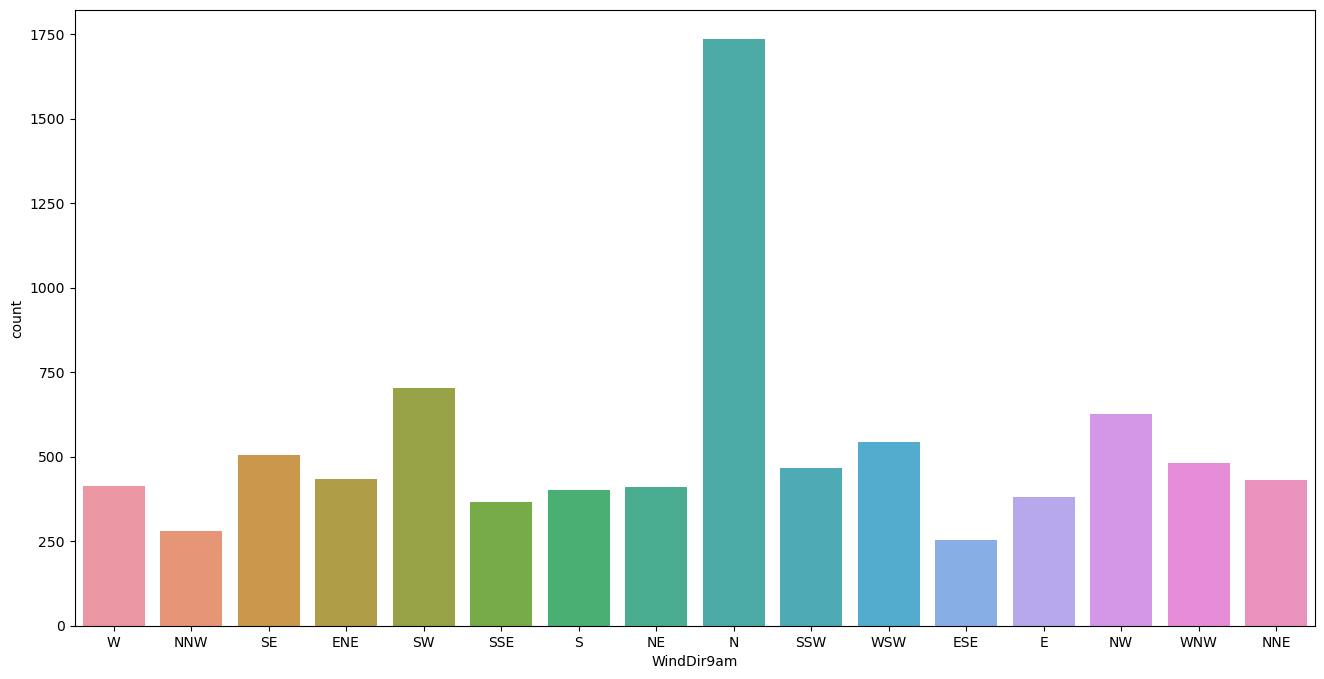

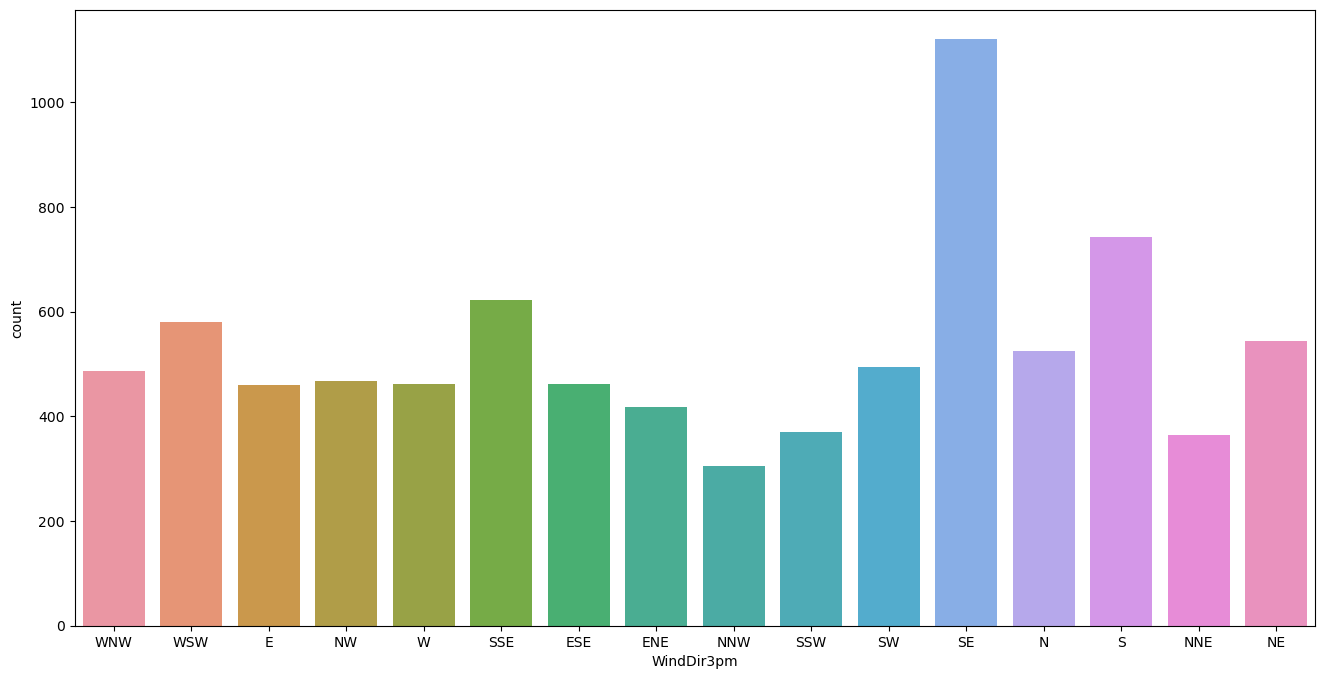

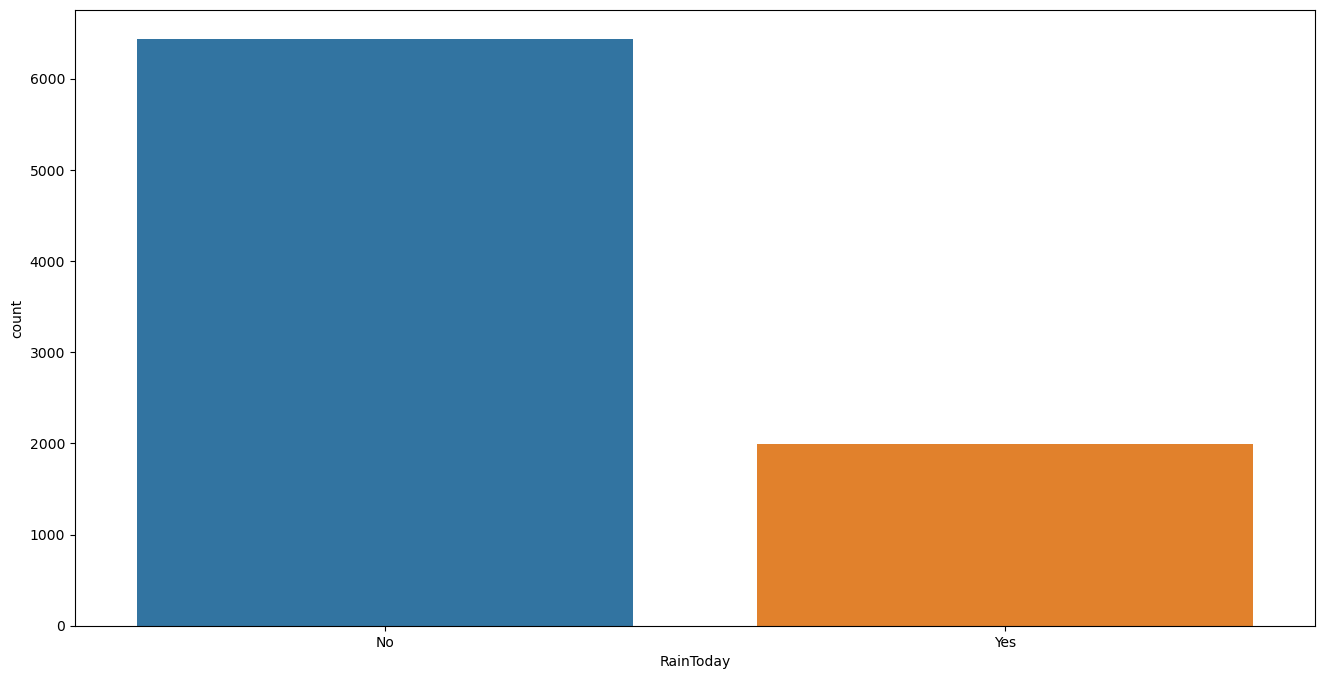

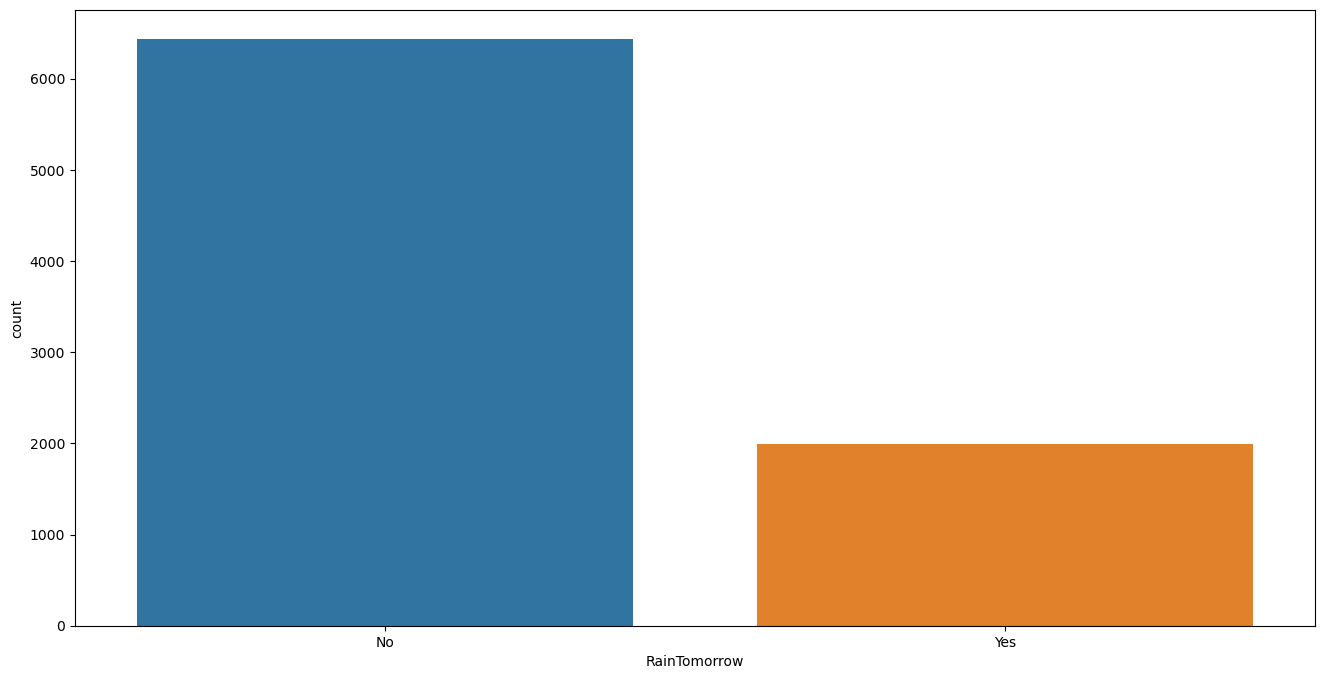

In [272]:
for i in df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]:
    plt.figure(figsize=(16, 8))
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=0)
    plt.show()

#### Observation:
- There is a significant class imbalance.
- There is significantly large number of RainTomorrow with "No" compared to "Yes".

#### Next:
- To check for multicollinearity

### (iv) Correlation Analysis:
   - To compute and visualize pairwise correlations between numerical variables using heatmap.
   - To identify highly correlated variables (correlation coefficient > 0.7 or < -0.7).

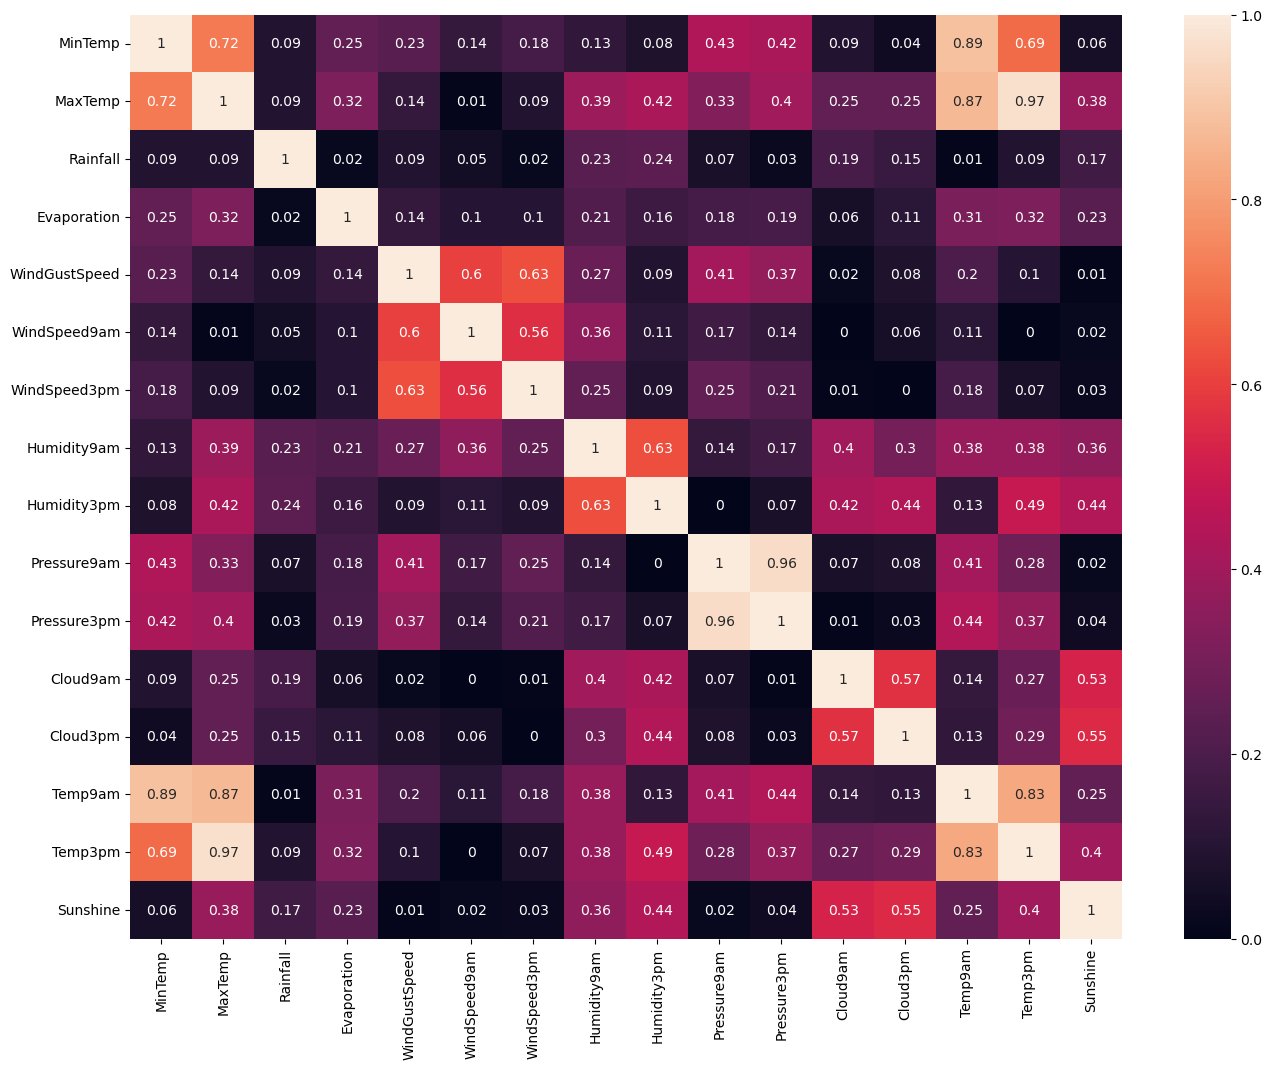

In [273]:
# Heatmap for correlation coefficient
plt.figure(figsize=(16,12))
sns.heatmap(round(abs(df[Numerical].corr()),2),annot=True)
plt.show()

#### Observation: 
- MinTemp is highly correlated with Temp9am and MaxTemp.
- MaxTemp is very highly correlated with Temp3pm and Temp9am.
- Temp9am is highly correlated with Temp3pm.


#### Next:
- To identify the outliers


### (v) Feature Engineering:
### Detecting outliers using z-score
- z = (X-μ)/σ;  where, X = data point, μ = mean of the data, σ = standard deviation

- Listing outliers having z score > 3 in variables "Rainfall", "Evaporation", "WindGustSpeed", and  "Sunshine".

In [274]:
for i in ["Rainfall", "Evaporation", "WindGustSpeed", "Sunshine"]:
    outlier=[]
    mean=df[i].mean()
    std=df[i].std()
    threshold=3
    for j in df[i].values:
        if np.abs((j-mean)/std)>threshold:
            outlier.append(j)
    print(f'\nOutliers in {i}:\n',outlier)
        
        


Outliers in Rainfall:
 [52.2, 66.0, 50.8, 52.6, 35.0, 99.2, 51.0, 39.8, 62.6, 38.0, 59.0, 42.8, 76.0, 55.8, 70.0, 71.2, 141.8, 96.0, 371.0, 58.0, 34.2, 38.8, 67.0, 80.6, 56.6, 45.2, 59.4, 42.6, 52.6, 34.4, 90.0, 128.0, 61.2, 73.8, 35.8, 62.6, 132.5, 46.8, 38.2, 35.0, 33.8, 38.4, 51.4, 240.0, 41.2, 43.0, 38.4, 37.6, 49.6, 43.4, 85.6, 47.0, 39.8, 35.4, 43.0, 40.6, 225.0, 37.4, 36.0, 110.8, 91.4, 58.2, 51.4, 49.2, 42.6, 36.2, 48.4, 49.0, 60.8, 57.4, 35.4, 43.0, 40.6, 225.0, 37.4, 36.0, 110.8, 91.4, 58.2, 51.4, 49.2, 42.6, 36.2, 48.4, 49.0, 60.8, 57.4, 45.8, 35.2, 39.2, 61.4, 82.2, 46.8, 39.2, 34.6, 45.8, 35.2, 39.2, 61.4, 82.2, 46.8, 39.2, 34.6, 36.2, 68.8, 36.0, 44.4, 34.2, 168.4, 58.4, 38.4, 76.4, 37.4, 37.2, 36.0, 35.4, 42.6, 37.4, 91.0, 142.2, 96.8, 40.0]

Outliers in Evaporation:
 [18.0, 24.2, 19.4, 28.0, 24.6, 22.6, 37.0, 26.0, 28.0, 19.8, 24.4, 27.4, 22.6, 18.0, 22.6, 24.0, 26.0, 23.0, 29.2, 20.6, 23.0, 22.8, 20.0, 18.4, 24.8, 20.8, 32.0, 55.4, 17.8, 59.2, 33.8, 32.0, 22.6, 145.0,

#### Observation:
- There are no outliers in "Sunshine"
    
#### Next:
- Removing the outliers from the dataframe to reduce skewness.

In [275]:
for i in ["Rainfall", "Evaporation", "WindGustSpeed", "Sunshine"]:
    outlier=[]
    mean=df[i].mean()
    std=df[i].std()
    threshold=3   # z score >3 are assumed outliers
    for j in df[i].values:
        if np.abs((j-mean)/std)>threshold:
            outlier.append(j)
        df = df[~df[i].isin(outlier)]
df
        

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No


In [276]:
abs(df[Numerical].skew())

MinTemp          0.078363
MaxTemp          0.368675
Rainfall         3.512742
Evaporation      0.672847
WindGustSpeed    0.540470
WindSpeed9am     0.925801
WindSpeed3pm     0.457585
Humidity9am      0.254386
Humidity3pm      0.110675
Pressure9am      0.019419
Pressure3pm      0.025707
Cloud9am         0.356494
Cloud3pm         0.270299
Temp9am          0.018158
Temp3pm          0.389709
Sunshine         0.715586
dtype: float64

#### Observation:
- After removing the outliers, the skewness of variables "Rainfall", "Evaporation", "WindGustSpeed", and "Sunshine" has considerably reduced.

#### Next:
- To plot the boxplot again after dropping the outliers from "Rainfall", "Evaporation", "WindGustSpeed", "Sunshine".

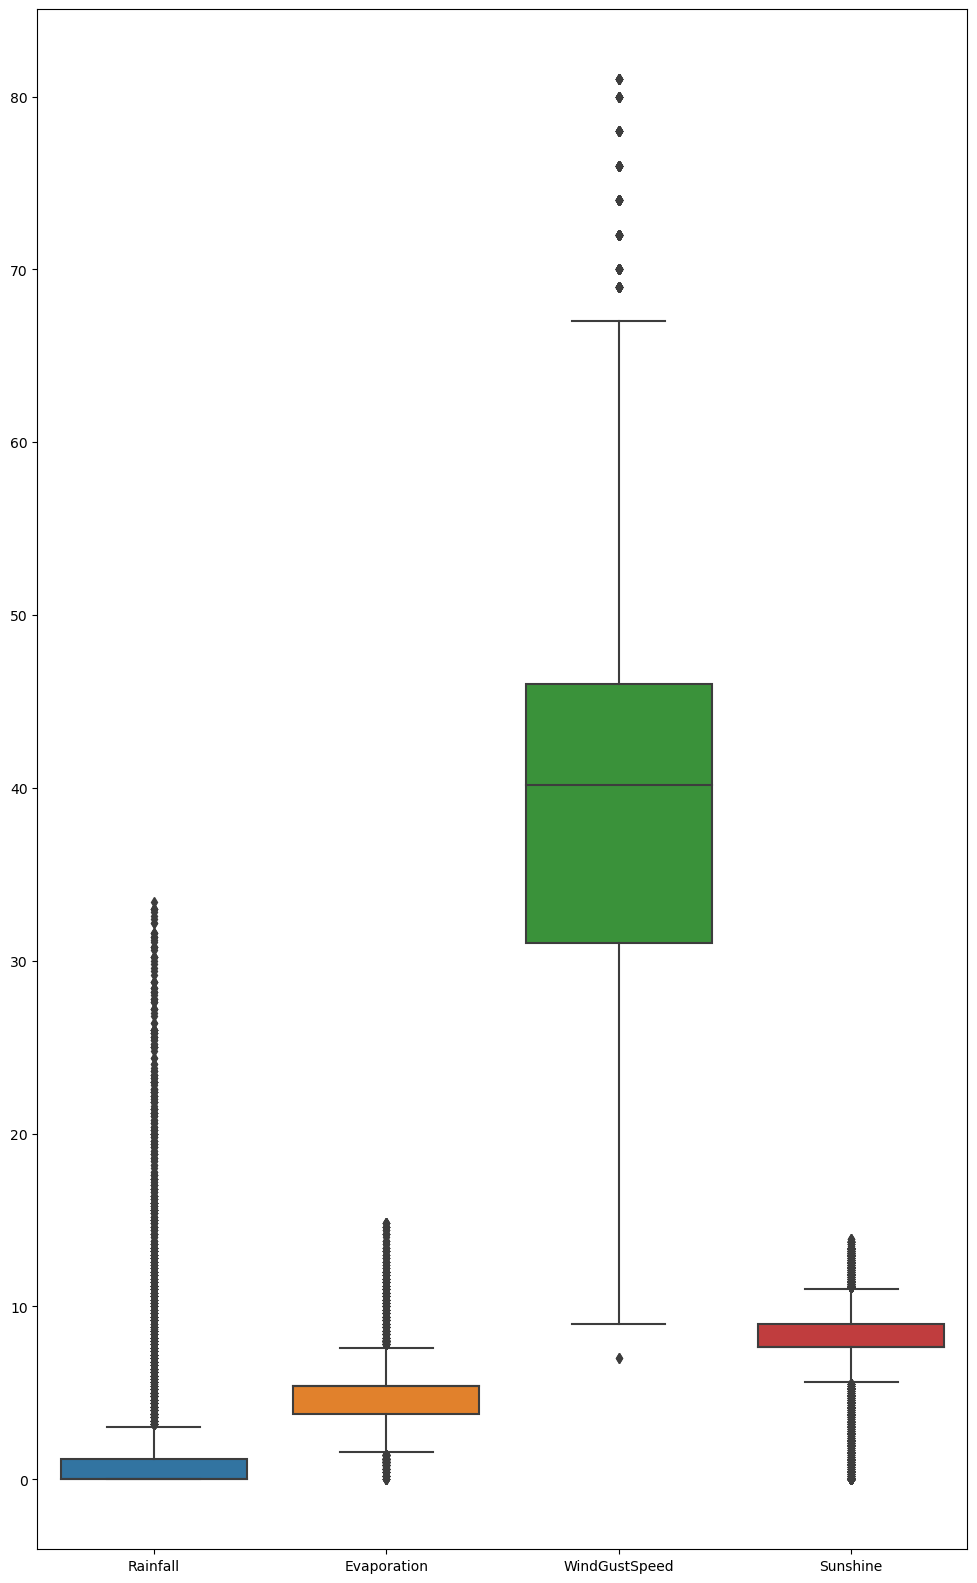

In [277]:
plt.figure(figsize=(12,20))
# for i in Numerical:
sns.boxplot(data=df[["Rainfall", "Evaporation", "WindGustSpeed", "Sunshine"]])
plt.xticks(rotation=0)
plt.show()

#### Observation:
- It can be clearly observed from the boxplot that the outliers have considerably reduced.

- However, there is still considerable skewness in "Rainfall" and "Sunshine".

#### Next:
- To reduce the skewness present even after dropping the outliers, there is a need to perform data transformation.

In [278]:
from scipy.stats import boxcox
X=pd.DataFrame()
for i in df.select_dtypes(include=[float,int]).columns:
    if abs(df[i].skew())>0.7:                    # To perform boxcox transformation ofthose variables having skewness>0.7
        transformed_data, lambda_value = boxcox(df[i]+1) 
        X[i]=transformed_data
        sk1=pd.Series(X[i]).skew()
        print(f'{i} = {sk1:.2f}')

Rainfall = 0.92
Sunshine = -0.06
WindSpeed9am = -0.09


#### Observation:
- Skewness of all the variables have considerably reduced

#### Next:
- To replace variables by their transformed values. 

In [279]:
df1=df.drop(columns=X.columns,inplace=False)
df1.reset_index(inplace=True)
df2=pd.concat([df1,X],axis=1)
df2.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall,Sunshine,WindSpeed9am
0,2008-12-01,Albury,13.4,22.9,5.389395,W,44.0,W,WNW,24.0,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,0.332857,14.667932,6.927703
1,2008-12-02,Albury,7.4,25.1,5.389395,WNW,44.0,NNW,WSW,22.0,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,0.000000,14.667932,2.432323
2,2008-12-03,Albury,12.9,25.7,5.389395,WSW,46.0,W,WSW,26.0,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,0.000000,14.667932,6.718416
3,2008-12-04,Albury,9.2,28.0,5.389395,NE,24.0,SE,E,9.0,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,0.000000,14.667932,4.798947
4,2008-12-05,Albury,17.5,32.3,5.389395,W,41.0,ENE,NW,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,0.423197,14.667932,3.578490


#### Observation:
- The variables have been replaced by their transformed values.

#### Next:
- To set "Date" as index

In [281]:
df2.set_index("Date",inplace=True)
df2

,Location,MinTemp,MaxTemp,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall,Sunshine,WindSpeed9am
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.900000,5.389395,W,44.000000,W,WNW,24.0,71.0,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,0.332857,14.667932,6.927703
2008-12-02,Albury,7.4,25.100000,5.389395,WNW,44.000000,NNW,WSW,22.0,44.0,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,0.000000,14.667932,2.432323
2008-12-03,Albury,12.9,25.700000,5.389395,WSW,46.000000,W,WSW,26.0,38.0,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,0.000000,14.667932,6.718416
2008-12-04,Albury,9.2,28.000000,5.389395,NE,24.000000,SE,E,9.0,45.0,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,0.000000,14.667932,4.798947
2008-12-05,Albury,17.5,32.300000,5.389395,W,41.000000,ENE,NW,20.0,82.0,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,0.423197,14.667932,3.578490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.400000,5.389395,E,31.000000,SE,ENE,11.0,51.0,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,0.000000,14.667932,5.329237
2017-06-22,Uluru,3.6,25.300000,5.389395,NNW,22.000000,SE,N,9.0,56.0,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,0.000000,14.667932,5.329237
2017-06-23,Uluru,5.4,26.900000,5.389395,N,37.000000,SE,WNW,9.0,53.0,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,0.000000,14.667932,4.220561


In [292]:
df2.shape

(8143, 22)

#### Next:
- To check multicollinearity of the variables after removing outliers and performaing box-cox transformation

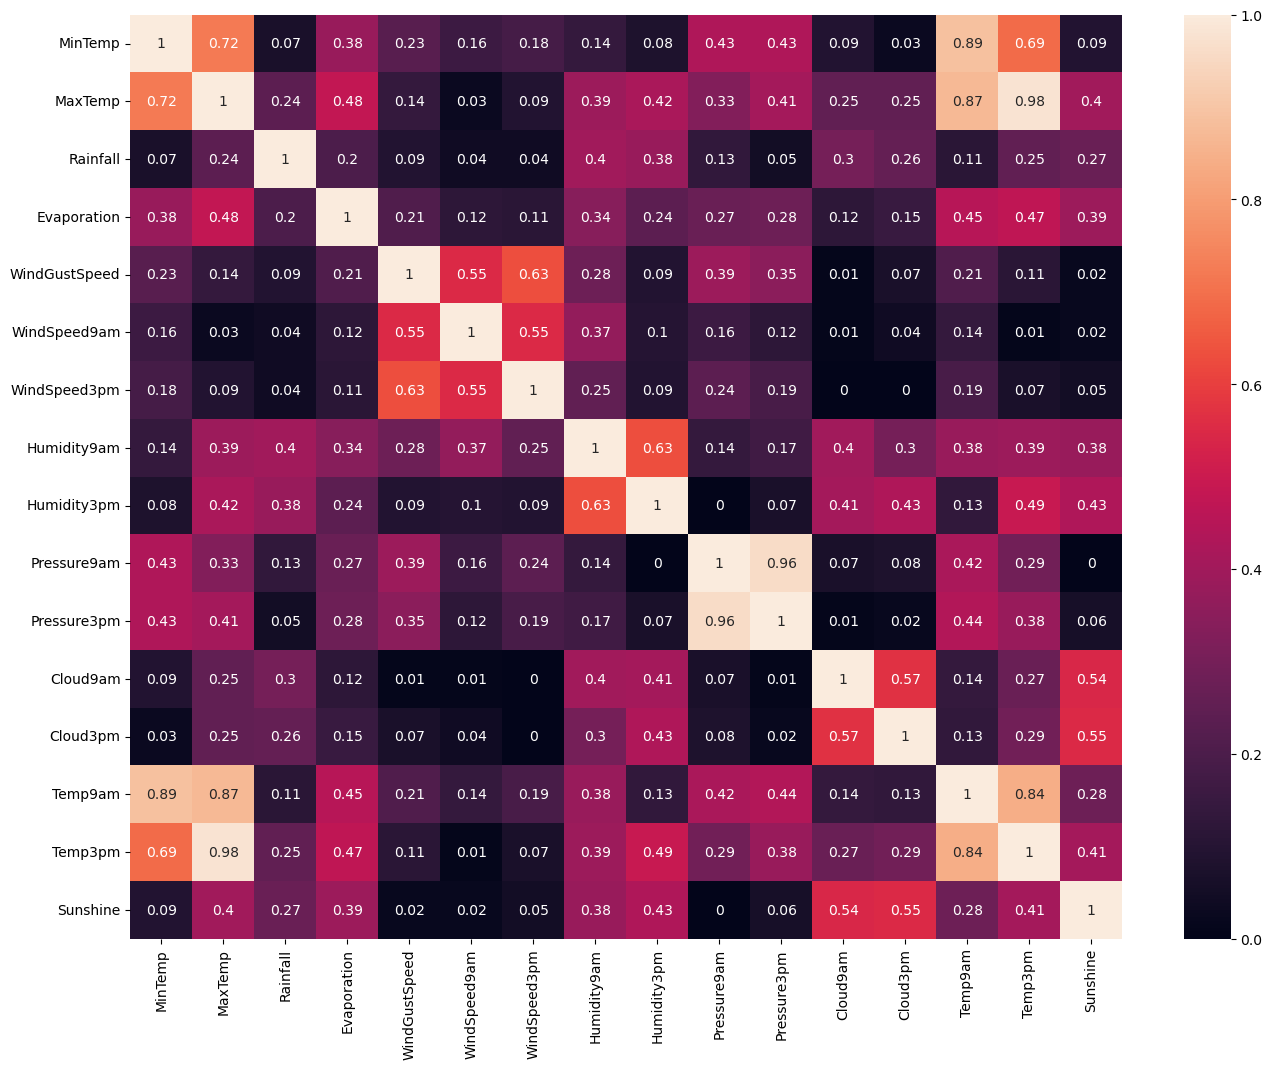

In [282]:
# Heatmap for correlation coefficient
plt.figure(figsize=(16,12))
sns.heatmap(round(abs(df2[Numerical].corr()),2),annot=True)
plt.show()

#### Observation:
- Transformation and removing outliers have not made any changes to reduce the multicolliearity

#### Next:
- To estimate the extent of multicollinearity using variance inflation factor. But before that mapping the target variable 'RainTomorrow' to numerical values

In [283]:
df2['RainTomorrow']=df2['RainTomorrow'].map({"No":0,"Yes":1})
df2.head()

,Location,MinTemp,MaxTemp,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall,Sunshine,WindSpeed9am
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,5.389395,W,44.0,W,WNW,24.0,71.0,...,1007.1,8.000000,4.503183,16.9,21.8,No,0,0.332857,14.667932,6.927703
2008-12-02,Albury,7.4,25.1,5.389395,WNW,44.0,NNW,WSW,22.0,44.0,...,1007.8,4.566622,4.503183,17.2,24.3,No,0,0.000000,14.667932,2.432323
2008-12-03,Albury,12.9,25.7,5.389395,WSW,46.0,W,WSW,26.0,38.0,...,1008.7,4.566622,2.000000,21.0,23.2,No,0,0.000000,14.667932,6.718416
2008-12-04,Albury,9.2,28.0,5.389395,NE,24.0,SE,E,9.0,45.0,...,1012.8,4.566622,4.503183,18.1,26.5,No,0,0.000000,14.667932,4.798947
2008-12-05,Albury,17.5,32.3,5.389395,W,41.0,ENE,NW,20.0,82.0,...,1006.0,7.000000,8.000000,17.8,29.7,No,0,0.423197,14.667932,3.578490


### Variance Inflation Factor (VIF): To estimate the extent of multicollinearity

In [286]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df2[Numerical]
y=df2['RainTomorrow']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,MinTemp,55.88
1,MaxTemp,428.32
2,Rainfall,2.12
3,Evaporation,9.48
4,WindGustSpeed,20.36
5,WindSpeed9am,8.81
6,WindSpeed3pm,9.08
7,Humidity9am,68.17
8,Humidity3pm,47.20
9,Pressure9am,483123.00


#### Observation: 
- Variables 'Pressure9am' and 'Pressure3pm' have very high VIF values.

#### Next:
- Tree based models like Decision tree, Random forest, GradientBoost algorithms or Regularized regression model like ridge classifier, is also expected to work reasonably well in the presence of multicollinearity. 


- To perform categorical to numerical transformation: 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'.

- Using dummy encoding for 'WindGustDir', 'WindDir9am', 'WindDir3pm'

In [287]:
df_encoded=pd.get_dummies(df2,columns=['Location','WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'],drop_first=True)
df_encoded.shape

(8143, 74)

#### Observation:
- Number of columns increased to 74 from 22 after dummy encoding


In [288]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 2008-12-01 to 2017-06-25
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                8143 non-null   float64
 1   MaxTemp                8143 non-null   float64
 2   Evaporation            8143 non-null   float64
 3   WindGustSpeed          8143 non-null   float64
 4   WindSpeed3pm           8143 non-null   float64
 5   Humidity9am            8143 non-null   float64
 6   Humidity3pm            8143 non-null   float64
 7   Pressure9am            8143 non-null   float64
 8   Pressure3pm            8143 non-null   float64
 9   Cloud9am               8143 non-null   float64
 10  Cloud3pm               8143 non-null   float64
 11  Temp9am                8143 non-null   float64
 12  Temp3pm                8143 non-null   float64
 13  RainTomorrow           8143 non-null   int64  
 14  Rainfall               8143 non-null   float64

#### Obesrvation:
- All the variables are now of numerical data type.
- There are no null or missing values

#### Next:
- Checking the scale of the variables

In [289]:
df_encoded.describe()

,MinTemp,MaxTemp,Evaporation,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.00000,8143.000000,8143.000000,8143.000000,...,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,13.103943,23.823075,5.121969,39.664115,18.355647,67.736526,51.07411,1017.765286,1015.343310,4.533046,...,0.054648,0.088420,0.134349,0.074420,0.042613,0.059560,0.054280,0.057595,0.068525,0.225838
std,5.385137,6.095874,2.255690,13.105063,9.576515,16.673456,18.15577,6.192479,6.148184,2.429793,...,0.227306,0.283921,0.341047,0.262469,0.201996,0.236685,0.226583,0.232991,0.252660,0.418159
min,-2.000000,8.200000,0.000000,7.000000,0.000000,10.000000,6.00000,989.800000,982.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.100000,19.300000,3.800000,31.000000,11.000000,56.000000,39.00000,1014.100000,1011.500000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.193305,23.300000,5.389395,40.174469,19.000000,68.000000,51.00000,1017.640233,1015.236075,4.566622,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.200000,28.000000,5.389395,46.000000,24.000000,80.000000,63.00000,1021.400000,1018.900000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.300000,45.500000,14.800000,81.000000,83.000000,100.000000,99.00000,1039.000000,1036.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation
- Variables have different range of values

#### Next:
- Scaling the dataframe using min max scaler

In [290]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X1=df_encoded.drop(columns='RainTomorrow',inplace=False)
X2=scale.fit_transform(X1)
X3=pd.DataFrame(X2,columns=X1.columns)
X3.describe()

,MinTemp,MaxTemp,Evaporation,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,...,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,0.498480,0.418849,0.346079,0.441407,0.221152,0.641517,0.484668,0.568400,0.610985,0.566631,...,0.054648,0.088420,0.134349,0.074420,0.042613,0.059560,0.054280,0.057595,0.068525,0.225838
std,0.177727,0.163428,0.152411,0.177095,0.115380,0.185261,0.195223,0.125863,0.115785,0.303724,...,0.227306,0.283921,0.341047,0.262469,0.201996,0.236685,0.226583,0.232991,0.252660,0.418159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.366337,0.297587,0.256757,0.324324,0.132530,0.511111,0.354839,0.493902,0.538606,0.375000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501429,0.404826,0.364148,0.448304,0.228916,0.644444,0.483871,0.565858,0.608966,0.570828,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.633663,0.530831,0.364148,0.527027,0.289157,0.777778,0.612903,0.642276,0.677966,0.875000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:
- All the variables have been scaled between 0 and 1.

#### Next:
- To remove class imbalance of variable 'RainTomorrow'.

In [291]:
y=df_encoded['RainTomorrow']
y.value_counts()

0    6278
1    1865
Name: RainTomorrow, dtype: int64

#### Observation:
- The target class is highly imbalanced.

#### Next:
- Oversampling additional data to balance the minority class

In [293]:
### SMOTE: To oversample additional minority classes to remove imbalance
from imblearn.over_sampling import SMOTE
ST=SMOTE()
X3,y = ST.fit_resample(X3,y)

In [294]:
y.value_counts()

0    6278
1    6278
Name: RainTomorrow, dtype: int64

#### Observation:
- Both the classes Class 1 which represents "Y" and class 0 which represents "N" have now become balanced.

#### Next:
- To build the model

## Model Building

In [295]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

### Random forest
#### Random state: To find the best one

In [296]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=i)
    RF=RandomForestClassifier()
    model_RF=RF.fit(X_train,y_train)
    y_pred=model_RF.predict(X_test)
    Acc=accuracy_score(y_test,y_pred)
    if Acc>maxAcc:
        maxAcc=Acc
        random=i
print(f'Max accuracy: {round(maxAcc,2)}')
print(f'Best_random_state: {random}')

Max accuracy: 0.94
Best_random_state: 350


#### Observation: 
- Random state (in range of 1000) with best accuracy(=0.94) is 350.

#### Next:
- This value of random state will be used in model building with other algorithms.

In [298]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
RF=RandomForestClassifier()
model_RF=RF.fit(X_train,y_train)
y_pred_RF=model_RF.predict(X_test)
Acc=accuracy_score(y_test,y_pred_RF)
report=classification_report(y_test,y_pred_RF)
conf_matrix=confusion_matrix(y_test,y_pred_RF)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.939
Cross validation score: 0.912
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1893
           1       0.93      0.95      0.94      1874

    accuracy                           0.94      3767
   macro avg       0.94      0.94      0.94      3767
weighted avg       0.94      0.94      0.94      3767

Confusion matrix:
 [[1765  128]
 [ 101 1773]]


### Logistic Regression

In [297]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
LR=LogisticRegression()
model_LR=LR.fit(X_train,y_train)
y_pred=model_LR.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy score : 0.801
Cross validation score: 0.782
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1893
           1       0.80      0.80      0.80      1874

    accuracy                           0.80      3767
   macro avg       0.80      0.80      0.80      3767
weighted avg       0.80      0.80      0.80      3767

Confusion matrix:
 [[1520  373]
 [ 377 1497]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Decision Tree Classifier

In [299]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
DT=DecisionTreeClassifier()
model_DT=DT.fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
Acc=accuracy_score(y_test,y_pred_DT)
report=classification_report(y_test,y_pred_DT)
conf_matrix=confusion_matrix(y_test,y_pred_DT)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.879
Cross validation score: 0.85
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1893
           1       0.88      0.87      0.88      1874

    accuracy                           0.88      3767
   macro avg       0.88      0.88      0.88      3767
weighted avg       0.88      0.88      0.88      3767

Confusion matrix:
 [[1673  220]
 [ 236 1638]]


### AdaBoost Classifier

In [300]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
AB=AdaBoostClassifier()
model_AB=AB.fit(X_train,y_train)
y_pred_AB=model_AB.predict(X_test)
Acc=accuracy_score(y_test,y_pred_AB)
report=classification_report(y_test,y_pred_AB)
conf_matrix=confusion_matrix(y_test,y_pred_AB)
cv_score=cross_val_score(AB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.821
Cross validation score: 0.806
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1893
           1       0.82      0.82      0.82      1874

    accuracy                           0.82      3767
   macro avg       0.82      0.82      0.82      3767
weighted avg       0.82      0.82      0.82      3767

Confusion matrix:
 [[1550  343]
 [ 331 1543]]


### Gradient Boosting Classifier

In [301]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
GB=GradientBoostingClassifier()
model_GB=GB.fit(X_train,y_train)
y_pred_GB=model_GB.predict(X_test)
Acc=accuracy_score(y_test,y_pred_GB)
report=classification_report(y_test,y_pred_GB)
conf_matrix=confusion_matrix(y_test,y_pred_GB)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.863
Cross validation score: 0.847
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1893
           1       0.86      0.86      0.86      1874

    accuracy                           0.86      3767
   macro avg       0.86      0.86      0.86      3767
weighted avg       0.86      0.86      0.86      3767

Confusion matrix:
 [[1636  257]
 [ 258 1616]]


### Support Vector Classifier

In [302]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
SV=SVC()
model_SV=SV.fit(X_train,y_train)
y_pred_SV=model_SV.predict(X_test)
Acc=accuracy_score(y_test,y_pred_SV)
report=classification_report(y_test,y_pred_SV)
conf_matrix=confusion_matrix(y_test,y_pred_SV)
cv_score=cross_val_score(SV,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.886
Cross validation score: 0.863
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1893
           1       0.87      0.91      0.89      1874

    accuracy                           0.89      3767
   macro avg       0.89      0.89      0.89      3767
weighted avg       0.89      0.89      0.89      3767

Confusion matrix:
 [[1627  266]
 [ 164 1710]]


### K Neighbors Classifier

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
KN=KNeighborsClassifier()
model_KN=KN.fit(X_train,y_train)
y_pred_KN=model_KN.predict(X_test)
Acc=accuracy_score(y_test,y_pred_KN)
report=classification_report(y_test,y_pred_KN)
conf_matrix=confusion_matrix(y_test,y_pred_KN)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score : 0.847
Cross validation score: 0.814
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83      1893
           1       0.78      0.96      0.86      1874

    accuracy                           0.85      3767
   macro avg       0.86      0.85      0.84      3767
weighted avg       0.86      0.85      0.84      3767

Confusion matrix:
 [[1398  495]
 [  83 1791]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Observation: 
- We observe that among all the classification algorithms "Random forest classifier" has the best accuracy (0.94).

#### Next, 
- To improve the accuracy of the "Random forest classifier", we will perform hyperparameter tuning using GridSearchCV.

### Hyperparameter tuning: Random Forest Classifier using GridSearchCV
- Currently used hyperparameters by Random Forest Classifier

In [304]:
print('Parameters currently in use:\n')
GridSearchCV.get_params(RandomForestClassifier())

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [305]:
from sklearn.model_selection import GridSearchCV
hyp={'bootstrap': [True],                # each tree is built using a bootstrap sample of the training data
 'ccp_alpha': [0, 0.01, 0.1, 1.0],       # to control the complexity of the tree by pruning
 'class_weight': [None],                 # set to none as both classes are balanced
 'criterion': ['gini','entropy'],
 'max_depth': [2,6,10,14,18,20,22,24],   # maximum depth of each decision tree in the forest
 'max_features': ['auto'],
 'min_impurity_decrease': [0.0],      # minimum impurity decrease required to split a node further
 'min_samples_leaf': [1],
 'min_samples_split': [2,3,5,10],
 'min_weight_fraction_leaf':[0.0],
 'n_estimators': [100,200,300],      # number of base learners (trees) to be included in the ensemble
 'n_jobs': [-1],                     # Utilize all available cores
 'oob_score': [False],               # average of the prediction accuracy on each out-of-bag sample across all trees in the forest.
 'random_state': [random],
 'verbose': [0],
 'warm_start': [True]}                # to reuse the existing solution and continue training an ensemble method from where it left off
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=hyp,cv=5)
model_hyp=grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", round(grid_search.best_score_,3))

Best parameters: {'bootstrap': True, 'ccp_alpha': 0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 22, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 350, 'verbose': 0, 'warm_start': True}
Best estimators: RandomForestClassifier(ccp_alpha=0, criterion='entropy', max_depth=22,
                       n_estimators=300, n_jobs=-1, random_state=350,
                       warm_start=True)
Best score: 0.909


#### Observation: 
- The hypertuned Random Forest Model has poorer accuracy(0.91) compared to the default "Random Forest Model"(0.94).

#### Next:
- We save the default "Random Forest Model" as the final model.

### Final model: saving "Random Forest Model"

In [306]:
import pickle
with open('Rainfall','wb') as f:
    pickle.dump(model_RF,f)

### Loading the saved model

In [307]:
with open('Rainfall','rb') as f:
    mrf=pickle.load(f)
round(mrf.score(X_test,y_test),3)

0.939